# False domains contest solution
## F1-test score: 98,62
### Done by Fedor Kitashov

In [1]:
from sklearn import ensemble , cross_validation, learning_curve, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sgs
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('train.csv', header=-1)

In [4]:
train_data.head()

,0,1
0,0.0,ethrdigljsvg.ru
1,0.0,1ytfboujfdew51uj1crz1p1sil1.org
2,1.0,my3w.com
3,0.0,sonafhei.ru
4,1.0,fullhdfilm.gen.tr


In [69]:
x = np.array([])

In [71]:
def return_positive_data(dataframe):
    data = np.array([])
    for i in range(len(dataframe)):
        if dataframe[0][i] == 1:
            data.append(dataframe[1][i])
    return data        
        

In [ ]:
return_positive_data*

In [5]:
train_data.shape

(95000, 2)

In [6]:
train_data.columns

Int64Index([0, 1], dtype='int64')

In [7]:
train_data_target = train_data[0].values

In [8]:
print train_data_target

[ 0.  0.  1. ...,  0.  1.  1.]


In [9]:
print type(train_data_target)

<type 'numpy.ndarray'>


In [10]:
print train_data_target.shape

(95000,)


In [11]:
data_target = train_data_target.reshape(95000,)

In [12]:
print data_target.shape

(95000,)


In [13]:
print len(train_data_target)

95000


In [59]:
data = train_data.iloc[:, 1:]

In [36]:
data.head()

,1
0,ethrdigljsvg.ru
1,1ytfboujfdew51uj1crz1p1sil1.org
2,my3w.com
3,sonafhei.ru
4,fullhdfilm.gen.tr


In [46]:
data.iloc[:1,]

,1
0,ethrdigljsvg.ru


In [16]:
print data[:5]

                                 1
0                  ethrdigljsvg.ru
1  1ytfboujfdew51uj1crz1p1sil1.org
2                         my3w.com
3                      sonafhei.ru
4                fullhdfilm.gen.tr


In [17]:
nd_data = data.as_matrix()

In [18]:
print nd_data
print nd_data.shape

[['ethrdigljsvg.ru']
 ['1ytfboujfdew51uj1crz1p1sil1.org']
 ['my3w.com']
 ..., 
 ['heibedwwbxsj.com']
 ['cartstick.com']
 ['rtbs24.com']]
(95000, 1)


In [19]:
print nd_data.shape

(95000, 1)


In [47]:
print nd_data

[['ethrdigljsvg.ru']
 ['1ytfboujfdew51uj1crz1p1sil1.org']
 ['my3w.com']
 ..., 
 ['heibedwwbxsj.com']
 ['cartstick.com']
 ['rtbs24.com']]


In [58]:


print len(np.array_str(nd_data[0]))

19


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='char', 
                     ngram_range=(0,4))

matrix = cv.fit_transform(nd_data.ravel())

In [22]:
matrix

<95000x270833 sparse matrix of type '<type 'numpy.int64'>'
	with 5595067 stored elements in Compressed Sparse Row format>

In [23]:
print data_target.shape

(95000,)


In [24]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(matrix, 
                                                    data_target, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [25]:
print len(y_test)

31350


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=46, max_depth = 200, random_state = 1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=200, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

# Accuracy from trees count dependency

In [552]:
n_trees = [1] + range(150, 1000, 50) 

In [553]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_validation.cross_val_score(estimator, X_train, y_train, 
                                             scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 12min 29s, sys: 7.25 s, total: 12min 36s
Wall time: 8min 29s


In [554]:
scoring

matrix([[ 0.86271091,  0.87132353,  0.86213235],
        [ 0.96385145,  0.96229261,  0.96177413],
        [ 0.96908285,  0.96733597,  0.96809012],
        [ 0.9729475 ,  0.97237934,  0.97101244],
        [ 0.97417287,  0.97346342,  0.97256787],
        [ 0.97478556,  0.97468891,  0.97360483],
        [ 0.9759638 ,  0.97487745,  0.97388763],
        [ 0.97700066,  0.97525452,  0.97525452],
        [ 0.97695353,  0.97516026,  0.97596154],
        [ 0.97681214,  0.9754902 ,  0.975773  ]])

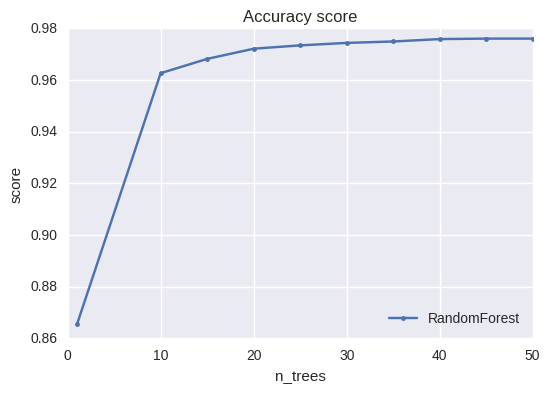

In [555]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

# XGBoost

In [529]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=200, n_estimators=46, min_child_weight=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=200, min_child_weight=3, missing=None,
       n_estimators=46, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1)

# Cross-validation testing

In [28]:
X_test

<31350x270833 sparse matrix of type '<type 'numpy.int64'>'
	with 1847444 stored elements in Compressed Sparse Row format>

In [29]:
preds = model.predict(X_test)

In [30]:
print preds

[ 1.  1.  1. ...,  1.  1.  0.]


In [31]:
print y_test

[ 1.  1.  1. ...,  1.  1.  0.]


In [32]:
print len(y_test)

31350


In [33]:
a = [1, 0, 1, 0, 1]
b = [1, 1, 1, 1, 1]


def error_numbers(a, b):
    errors = []
    i = 0
    for i in range(len(a)):
        if a[i] != b[i]:
            errors.append(i)

    return errors

error_numbers(a, b)

[1, 3]

In [34]:
preds_error = error_numbers(preds, y_test)

print len(preds_error)


603


In [149]:
test = train_data[-31350:]

In [150]:
test.iloc[preds_error,]

,0,1
63722,0.0,gfchbeddckjb.com
63759,1.0,nearandroid.com
63878,0.0,1398yzijondsi10frbra9cu534.org
63906,1.0,diyready.com
63940,0.0,bytotoconsentisthethem.com
63953,0.0,ofandothershererelinquish.com
63982,0.0,dugkeava.ru
64003,1.0,sigmalive.com
64031,0.0,lhhgjyryltdo.com
64045,0.0,irontrackconditionwaketower.com


# Second testing before submitting


In [118]:
test_data = pd.read_csv('test.csv', header = -1)

In [119]:
print test_data.head()

                           0
0                rowanbat.ru
1  weastateswhoseamerica.com
2              rankstore.com
3                meodeopa.ru
4           govrsvxqvvvf.com


In [120]:
nd_test = test_data.as_matrix()

In [121]:
print nd_test

[['rowanbat.ru']
 ['weastateswhoseamerica.com']
 ['rankstore.com']
 ..., 
 ['cupcoqsu.ru']
 ['aadharcarduidai.in']
 ['skillproxy.org']]


In [122]:
print nd_test.shape

(5000, 1)


In [123]:
#from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer(analyzer='char', 
                    # ngram_range=(1,3))

test_matrix = cv.transform(nd_test.ravel())

In [124]:
test_matrix

<5000x36443 sparse matrix of type '<type 'numpy.int64'>'
	with 221906 stored elements in Compressed Sparse Row format>

In [125]:
test_preds = model.predict(test_matrix)

In [126]:
print test_preds

[ 0.  0.  1. ...,  0.  1.  1.]


In [127]:
type(test_preds)

numpy.ndarray

In [128]:
print test_data.head()

                           0
0                rowanbat.ru
1  weastateswhoseamerica.com
2              rankstore.com
3                meodeopa.ru
4           govrsvxqvvvf.com


In [129]:
dataframe = ['test_preds']

In [130]:
nd_test.shape

(5000, 1)

In [131]:
nd_test = nd_test.reshape(5000,)

In [132]:
df = pd.DataFrame({'0':test_preds, '1':nd_test})

In [133]:
print df.head()

     0                          1
0  0.0                rowanbat.ru
1  0.0  weastateswhoseamerica.com
2  1.0              rankstore.com
3  0.0                meodeopa.ru
4  0.0           govrsvxqvvvf.com


In [134]:
df.head()

,0,1
0,0.0,rowanbat.ru
1,0.0,weastateswhoseamerica.com
2,1.0,rankstore.com
3,0.0,meodeopa.ru
4,0.0,govrsvxqvvvf.com


In [135]:
df.to_csv('answer.csv', header = 0, index = False)

# Some additional attemps with simple classifiers

In [222]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=1)
preds = model.fit_predict(matrix.toarray())
print preds

[0 0 0 ..., 0 0 0]


In [157]:
print data_target

[[ 0.]
 [ 1.]
 [ 0.]
 ..., 
 [ 0.]
 [ 1.]
 [ 1.]]


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
clf = LogisticRegression()
print cross_val_score(clf, matrix, data_target).mean()

0.614048552004


In [181]:
n_trees = [1] + range(10, 55, 5) 

In [183]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_validation.cross_val_score(estimator, matrix, data_target, 
                                             scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 3min 34s, sys: 2.73 s, total: 3min 37s
Wall time: 2min


In [186]:
scoring

matrix([[ 0.61540405,  0.61273922,  0.61330765],
        [ 0.61556194,  0.61305501,  0.61343397],
        [ 0.61556194,  0.61302343,  0.61340239],
        [ 0.61556194,  0.61302343,  0.61340239],
        [ 0.61556194,  0.61302343,  0.61343397],
        [ 0.61556194,  0.61302343,  0.61343397],
        [ 0.61556194,  0.61302343,  0.61343397],
        [ 0.61556194,  0.61302343,  0.61343397],
        [ 0.61556194,  0.61302343,  0.61343397],
        [ 0.61556194,  0.61302343,  0.61340239]])

In [187]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


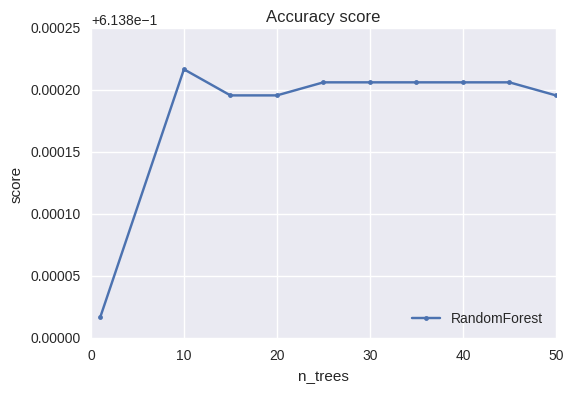

In [188]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [194]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=46, max_depth = 10, random_state = 1)

In [197]:
print type(matrix)

<type 'type'>
